In [1]:
#Doing PCA Implementation on a dataset of users who clicked vs didn't click on an advertisement
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')
df.head(n=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [3]:
#remove non-numerical features that can’t be parsed by this algorithm
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']

In [5]:
#4) Scale data
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#standardizes features by using zero as the mean for all variables and scaling to unit variance. 
scaler.fit(df)
scaled_data = scaler.transform(df)

In [6]:
#reshape the data frame’s features into a defined number of components
#components that have the most impact on data variability for this one
from sklearn.decomposition import PCA

#asking PCA to find the two components that best explain variability in the data
pca = PCA(n_components = 2)

pca.fit(scaled_data)
scaled_pca= pca.transform(scaled_data)
print(scaled_data.shape)
print(scaled_pca.shape)

(1000, 5)
(1000, 2)


(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  11,  13,  17,  20,
        21,  23,  25,  29,  30,  31,  35,  37,  40,  41,  42,  43,  44,
        46,  47,  50,  51,  55,  58,  60,  61,  62,  63,  65,  68,  71,
        75,  77,  80,  81,  84,  86,  92,  95,  99, 101, 102, 103, 104,
       105, 106, 109, 112, 114, 115, 120, 121, 122, 125, 127, 128, 129,
       133, 138, 139, 140, 143, 144, 150, 151, 153, 154, 155, 158, 160,
       161, 162, 163, 167, 169, 171, 172, 173, 175, 177, 179, 183, 184,
       187, 194, 197, 198, 199, 200, 201, 203, 204, 206, 207, 210, 212,
       214, 220, 221, 224, 228, 229, 230, 237, 239, 242, 243, 244, 245,
       250, 252, 255, 256, 258, 260, 264, 267, 269, 271, 272, 273, 274,
       276, 277, 278, 279, 283, 285, 287, 291, 293, 294, 295, 296, 297,
       298, 299, 300, 306, 307, 308, 310, 311, 313, 314, 316, 317, 318,
       321, 322, 323, 324, 327, 328, 330, 331, 333, 334, 336, 337, 338,
       339, 342, 343, 345, 346, 348, 350, 351, 352, 353, 355, 3

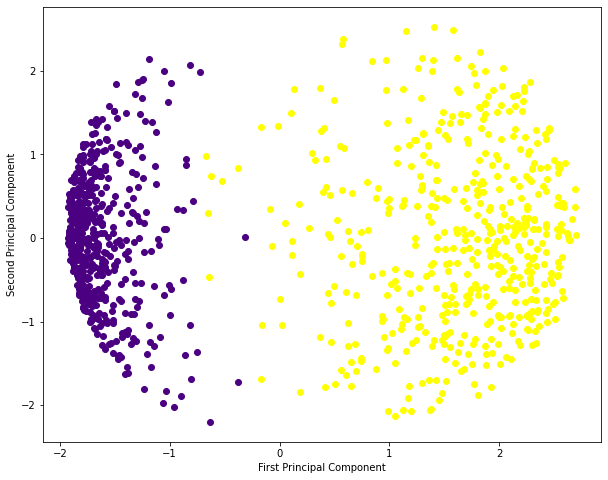

In [7]:
#visualize the two principal components on a 2-D scatterplot
#PC1 is marked on x-axis, PC2 on y

#6) Visualize the output
    #Version 1: visualized plot
#State the size of the plot
plt.figure(figsize=(10,8))
legend = df['Clicked on Ad']

colors = {0: '#4B0082', 1: '#FFFF00'}

#Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    print(ix)
    plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t])

#State the scatterplot labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#components don’t correspond to a single variable but rather a combination of variables.

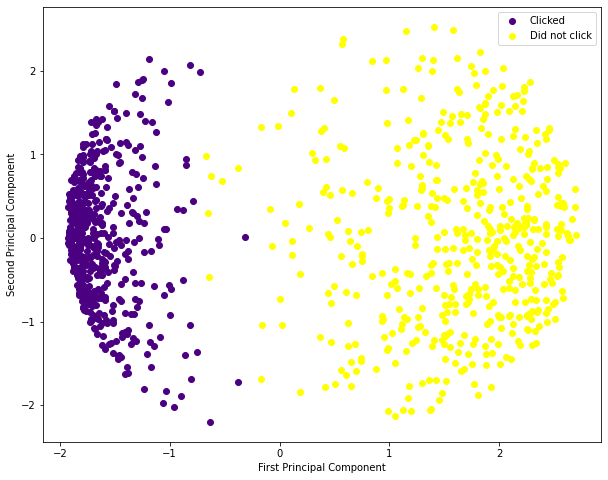

In [11]:
#6) Visualize the output
    #Version 2: visualized plot with a color legend
plt.figure(figsize=(10,8))
legend = df['Clicked on Ad']

#Add indigo and yellow RGB colors
colors = {0: '#4B0082', 1: '#FFFF00'} 
labels = {0: 'Clicked', 1: 'Did not click'}

#Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t], label=labels[t])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()